In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [118]:
data = pd.read_csv('Student_Marks.csv')

In [119]:
data

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [120]:
data.shape

(100, 3)

In [121]:
data.info

<bound method DataFrame.info of     number_courses  time_study   Marks
0                3       4.508  19.202
1                4       0.096   7.734
2                4       3.133  13.811
3                6       7.909  53.018
4                8       7.811  55.299
..             ...         ...     ...
95               6       3.561  19.128
96               3       0.301   5.609
97               4       7.163  41.444
98               7       0.309  12.027
99               3       6.335  32.357

[100 rows x 3 columns]>

In [122]:
data.describe

<bound method NDFrame.describe of     number_courses  time_study   Marks
0                3       4.508  19.202
1                4       0.096   7.734
2                4       3.133  13.811
3                6       7.909  53.018
4                8       7.811  55.299
..             ...         ...     ...
95               6       3.561  19.128
96               3       0.301   5.609
97               4       7.163  41.444
98               7       0.309  12.027
99               3       6.335  32.357

[100 rows x 3 columns]>

# Data Augmentation

In [123]:
def augment_data(df, num_augmentations=5):
    augmented_df = pd.DataFrame()
    for _ in range(num_augmentations):
        augmented = df.copy()
        augmented['time_study'] += np.random.normal(0, 0.5, len(df))
        augmented['Marks'] += np.random.normal(0, 2, len(df))
        augmented['time_study'] = np.clip(augmented['time_study'], 0, None)
        augmented['Marks'] = np.clip(augmented['Marks'], 0, 100)
        augmented_df = pd.concat([augmented_df, augmented], ignore_index=True)
    return pd.concat([df, augmented_df], ignore_index=True)

augmented_data = augment_data(data)

passMarks = 35
augmented_data['PassFail'] = augmented_data['Marks'].apply(lambda x: 'Pass' if x >= passMarks else 'Fail')

In [124]:
augmented_data

,number_courses,time_study,Marks,PassFail
0,3,4.508000,19.202000,Fail
1,4,0.096000,7.734000,Fail
2,4,3.133000,13.811000,Fail
3,6,7.909000,53.018000,Pass
4,8,7.811000,55.299000,Pass
...,...,...,...,...
595,6,3.839817,17.395506,Fail
596,3,0.259688,7.409676,Fail
597,4,7.637513,40.586826,Pass
598,7,0.183799,11.543563,Fail


In [125]:
augmented_data.shape

(600, 4)

# Visualization

## Time Study vs Marks by Pass/Fail

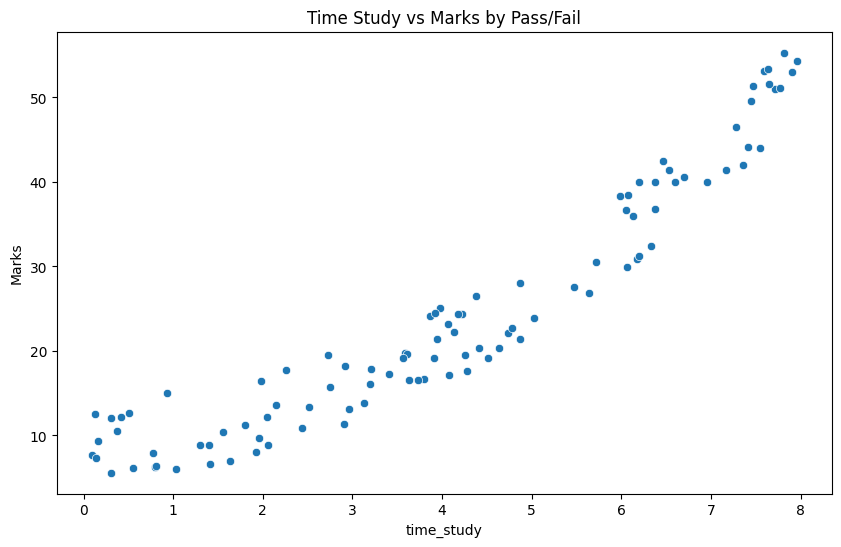

In [126]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="time_study", y="Marks")
plt.title("Time Study vs Marks by Pass/Fail")
plt.show()

## Pair Plot

# Data Processing and Variable Assignment

In [ ]:
X = augmented_data.iloc[:, 0:2].values
y = augmented_data.iloc[:, -1].values

In [ ]:
# Taking care of missing values if any
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, 0:2] = imputer.fit_transform(X[:, 0:2])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Data Splitting

In [ ]:
# Split Data 80 20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling

In [ ]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 0:2] = sc.fit_transform(X_train[:, 0:2])
X_test[:, 0:2] = sc.transform(X_test[:, 0:2])

# Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

for i in range(len(y_pred)):
    if y_pred[i] == 1: 
        print("Pass")
    else: 
        print("Fail")

Pass
Fail
Fail
Pass
Fail
Fail
Pass
Fail
Pass
Fail
Fail
Pass
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Pass
Fail
Pass
Pass
Pass
Fail
Fail
Pass
Pass
Fail
Pass
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Pass
Fail
Pass
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Pass
Fail
Fail
Pass
Fail
Pass
Fail
Fail
Fail
Fail
Fail
Fail
Pass
Fail
Fail
Pass
Fail
Fail
Pass
Fail
Pass
Fail
Pass
Pass
Fail
Fail
Fail
Fail
Fail
Fail
Pass
Fail
Pass
Fail
Fail
Fail
Fail
Fail
Fail
Pass
Pass
Fail
Fail
Fail
Fail
Fail
Fail
Pass
Pass
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Pass


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores for each fold: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean() * 100:.2f}%")

Cross-validation scores for each fold: [0.96666667 0.94166667 0.99166667 0.95833333 0.975     ]
Mean accuracy: 96.67%


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.83%
